In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras import layers, models

Loading Excel Data


In [ ]:
data = pd.read_excel('finaldata.xlsx')

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
print(X)
print(y)

         T(amb)       SOC  Volatage(v)  Current(A)    C rate
0      0.777778  0.360934     0.990475    0.999533  1.000000
1      0.777778  0.764973     0.968728    0.333000  0.333333
2      0.888889  0.221659     0.898087    0.333067  0.333333
3      0.777778  0.785699     0.974125    0.333067  0.333333
4      0.888889  0.034415     0.856179    0.333133  0.333333
...         ...       ...          ...         ...       ...
45929  0.777778  0.795432     0.999524    0.512364  1.000000
45930  0.777778  0.793439     0.999524    0.516497  1.000000
45931  0.777778  0.770430     0.999683    0.563021  1.000000
45932  0.888889  0.301834     0.994920    0.999800  1.000000
45933  0.888889  0.305776     0.995396    0.999800  1.000000

[45934 rows x 5 columns]
0        0.782600
1        0.732863
2        0.731811
3        0.734295
4        0.670448
           ...   
45929    0.978157
45930    0.977909
45931    0.977550
45932    0.989516
45933    0.992723
Name: T1, Length: 45934, dtype: float64


Splitting the data into test set and tarining set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building CNN Model

In [ ]:
model = Sequential()
model.add(Conv1D(filters = 64, kernel_size=3, activation ='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

Compile the Model

In [ ]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy', metrics=['accuracy'])

Train the Model

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1149/1149 [==============================] - 6s 4ms/step - loss: 0.5363 - accuracy: 0.0000e+00 - val_loss: 0.5254 - val_accuracy: 1.0885e-04
Epoch 2/100
1149/1149 [==============================] - 3s 2ms/step - loss: 0.5252 - accuracy: 0.0000e+00 - val_loss: 0.5250 - val_accuracy: 1.0885e-04
Epoch 3/100
1149/1149 [==============================] - 3s 3ms/step - loss: 0.5248 - accuracy: 0.0000e+00 - val_loss: 0.5241 - val_accuracy: 1.0885e-04
Epoch 4/100
1149/1149 [==============================] - 3s 3ms/step - loss: 0.5244 - accuracy: 0.0000e+00 - val_loss: 0.5239 - val_accuracy: 1.0885e-04
Epoch 5/100
1149/1149 [==============================] - 4s 4ms/step - loss: 0.5240 - accuracy: 0.0000e+00 - val_loss: 0.5241 - val_accuracy: 1.0885e-04
Epoch 6/100
1149/1149 [==============================] - 3s 3ms/step - loss: 0.5237 - accuracy: 0.0000e+00 - val_loss: 0.5232 - val_accuracy: 1.0885e-04
Epoch 7/100
1149/1149 [==============================] - 3s 2ms/step - loss: 0.523

In [ ]:
y_pred = model.predict(X_test)


288/288 [==============================] - 1s 1ms/step


In [ ]:
print("Predictions:", y_pred[:20])
print("True values:", y_test[:20])

Predictions: [[0.69868916]
 [0.7078832 ]
 [0.8689011 ]
 [0.73837817]
 [0.6186734 ]
 [0.9738275 ]
 [0.7274521 ]
 [0.8818492 ]
 [0.8002788 ]
 [0.7124472 ]
 [0.7176718 ]
 [0.8739162 ]
 [0.7624848 ]
 [0.738393  ]
 [0.61081576]
 [0.89156604]
 [0.8385635 ]
 [0.49118537]
 [0.8839437 ]
 [0.6612826 ]]
True values: 19484    0.700610
30758    0.704224
3184     0.881066
36056    0.740404
13363    0.631977
45568    0.977336
33807    0.734828
4657     0.884999
9480     0.804376
30532    0.708607
30489    0.723051
35750    0.903242
8850     0.766448
39077    0.822059
20217    0.614362
43949    0.896258
38630    0.839419
23502    0.499494
27513    0.902954
25764    0.664156
Name: T1, dtype: float64


In [ ]:
difference = y_test - y_pred.flatten()
print(difference)

19484    0.001921
30758   -0.003659
3184     0.012165
36056    0.002026
13363    0.013303
           ...   
35314    0.005334
18536    0.004343
26827    0.000562
17895    0.017420
6043     0.004880
Name: T1, Length: 9187, dtype: float64


In [ ]:
standarddeviation = np.std(difference)
print(standarddeviation)

0.032166819085122526


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error", rmse)

Mean Squared Error: 0.00123455499877959
Root Mean Squared Error 0.03513623484068249


Coefficient of Determination

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination R^(2):", r2)

Coefficient of determination R^(2): 0.9104339878986015


Scatter Plot

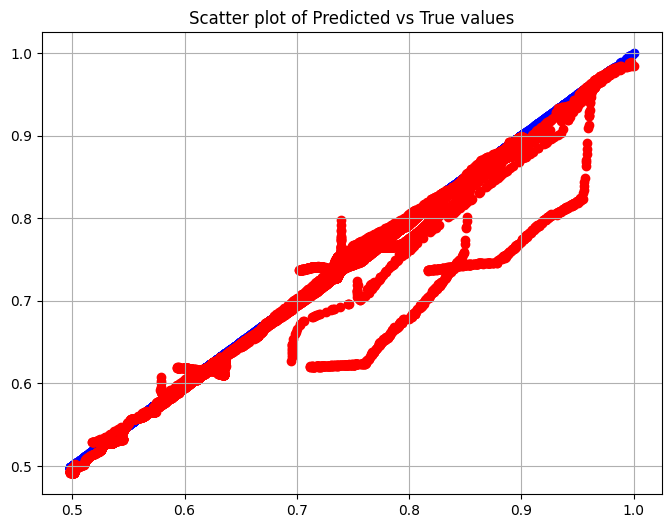

In [ ]:
import matplotlib.pyplot as  plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test, color='blue', label='True Values')
plt.scatter(y_test, y_pred, color='red', label='Predicted Values')
plt.title('Scatter plot of Predicted vs True values')
plt.grid(True)
plt.show()


Importing from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving the Pretrained Model

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/Colab Notebooks/saved model/trainedmodel.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading the Pretrained Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
pretrained_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/saved model/trainedmodel.hdf5')

Prediction for row - 1

In [ ]:
t_amb =0.777777777777778
soc =0.360934373656399
voltage =0.990475434558298
current =0.999533426648004
unknown_c_rate =0.666666666666667
input_data = np.array([[t_amb, soc, voltage,current,unknown_c_rate ]])
input_data = np.reshape(input_data, (input_data.shape[0], 5, 1))


In [ ]:
predictions = pretrained_model.predict(input_data)

1/1 [==============================] - 0s 69ms/step


In [ ]:
predicted_T1 = predictions[0][0]
print(f'Predicted T1 for C_rate={unknown_c_rate}: {predicted_T1}')


Predicted T1 for C_rate=0.666666666666667: 0.7907199263572693


Data Generation using pretrained model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
pretrained_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/saved model/trainedmodel.hdf5')
new_data = np.random.rand(12977, 5)
predicted_T1 = pretrained_model.predict(new_data)

406/406 [==============================] - 1s 1ms/step


In [ ]:
print("Shape of predicted T1:", predicted_T1.shape)

Shape of predicted T1: (12977, 1)


Prediction for the first 20 rows

In [ ]:
print("Predicted T1 for the first 20 rows:")
for i in range(20):
    print("Row {}: {}".format(i+1, predicted_T1[i]))


Predicted T1 for the first 20 rows:
Row 1: [0.4914539]
Row 2: [0.44956896]
Row 3: [0.7370317]
Row 4: [0.7163327]
Row 5: [0.82635057]
Row 6: [0.9998108]
Row 7: [0.19922875]
Row 8: [0.6382763]
Row 9: [0.2173842]
Row 10: [0.55774885]
Row 11: [0.6404726]
Row 12: [0.9529195]
Row 13: [0.76719147]
Row 14: [0.9663171]
Row 15: [0.98543006]
Row 16: [0.51204664]
Row 17: [0.9779297]
Row 18: [0.71593124]
Row 19: [0.7430695]
Row 20: [0.3478568]


Saving the predicted data in csv format

In [ ]:
np.savetxt("/content/gdrive/MyDrive/predicted_T1.csv", predicted_T1, delimiter=",")


Loading the original datra for C_rate = 1 and printing the value deviation for the first 20 rows

In [ ]:
original_data = pd.read_excel('c1data.xlsx')
actual_T1 = original_data.iloc[:, -1].values
num_rows = 20
selected_original_data =original_data.iloc[:num_rows, :-1]
new_data = np.random.rand(num_rows,5)

In [ ]:
predicted_T1 = pretrained_model.predict(new_data)


1/1 [==============================] - 0s 20ms/step


In [ ]:
selected_actual_T1 = actual_T1[:num_rows]
deviation = np.abs(predicted_T1.flatten() -selected_actual_T1 )
print("Deviation for the first {} rows:".format(num_rows))
for dev in deviation:
  print(dev)


Deviation for the first 20 rows:
0.6059482376122669
0.28005872977073243
0.1702225094415447
0.5126187723436082
0.08473821411484617
0.2526143851067608
0.17448746842288587
0.3993041889706601
0.6310760698413056
0.15518803240085333
0.040350361483981634
0.45158683089423846
0.5207694987041578
0.5989176093602021
0.2074279187551854
0.19030053795717772
0.3133597107724382
0.37161477384296493
0.0034852831333233025
0.257967574912101


Loading data for C_rate = 2

In [ ]:
data2 = pd.read_excel('c2datafinal.xlsx')

Defining and printing input(T(amb), SOC, Voltage(v), Current(A), and C rate) & output(T1)

In [ ]:
X1 = data2.iloc[:, :-1]
y1 = data2.iloc[:, -1]
print(X1)
print(y1)

      T(amb)        SOC  Voltage(v)  Current(A)    C rate
0         35  63.175190      12.596      11.672  1.333333
1         35  99.129704      12.595       1.287  1.333333
2         35  87.492892      12.596       4.847  1.333333
3         30  12.380606      12.589      18.714  1.333333
4         35   3.203149      12.410      20.001  1.333333
...      ...        ...         ...         ...       ...
8653      35  96.276123      12.595       2.205  1.333333
8654      30  96.189164      12.592       2.408  1.333333
8655      30  95.405584      12.591       2.694  1.333333
8656      35  59.924822      12.597      12.307  1.333333
8657      35  90.394380      12.596       4.001  1.333333

[8658 rows x 5 columns]
0       58.455737
1       50.523726
2       58.313339
3       35.087097
4       35.591606
          ...    
8653    53.610061
8654    46.746955
8655    47.344597
8656    57.642732
8657    57.301717
Name: T1, Length: 8658, dtype: float64


Importing from Scikit Learn to perform Normalization of the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [ ]:
scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

In [ ]:
X1_processed =pd.DataFrame(X1_scaled, columns=X1.columns)
X1_processed['C rate'] = 1.33
y1_scaled = scaler.fit_transform(y1.values.reshape(-1, 1))

Printing the Normalized Values

In [ ]:
print(X1_processed)
print(y1_scaled)

        T(amb)       SOC  Voltage(v)  Current(A)  C rate
0     0.333333  0.631752    0.998086    0.561589    1.33
1     0.333333  0.991297    0.997703    0.015154    1.33
2     0.333333  0.874929    0.998086    0.202473    1.33
3     0.000000  0.123806    0.995406    0.932123    1.33
4     0.333333  0.032031    0.926876    0.999842    1.33
...        ...       ...         ...         ...     ...
8653  0.333333  0.962761    0.997703    0.063457    1.33
8654  0.000000  0.961892    0.996554    0.074138    1.33
8655  0.000000  0.954056    0.996172    0.089187    1.33
8656  0.333333  0.599248    0.998469    0.595001    1.33
8657  0.333333  0.903944    0.998086    0.157958    1.33

[8658 rows x 5 columns]
[[0.94554735]
 [0.6717692 ]
 [0.9406324 ]
 ...
 [0.56203964]
 [0.917486  ]
 [0.90571566]]


Saving the Normalized File for input

In [ ]:
output_file_path = '/content/gdrive/MyDrive/c2_normalizedinputs.csv'
X1_processed.to_csv(output_file_path, index=False)
print(f"Processed data saved to {output_file_path}")



Processed data saved to /content/gdrive/MyDrive/c2_normalizedinputs.csv


Saving the Normalized file for Output

In [ ]:
normalized_output = pd.DataFrame(y1_scaled, columns=['Normalized_T1'])
output_path = '/content/gdrive/MyDrive/c2_normalized_output.csv'
normalized_output.to_csv(output_path, index=False)

In [ ]:
Loading the Pretrained Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
pretrained_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/saved model/trainedmodel.hdf5')

Prediction for Row-1 from the data of Pretrained Model

In [ ]:
t_amb =0.777777777777778
soc =0.360934373656399
voltage =0.990475434558298
current =0.999533426648004
unknown_c_rate1 =1.3333333333
input_data1 = np.array([[t_amb, soc, voltage,current,unknown_c_rate1 ]])
input_data1 = np.reshape(input_data1, (input_data1.shape[0], 5, 1))


In [ ]:
predictions2 = pretrained_model.predict(input_data1)

1/1 [==============================] - 0s 22ms/step


Predicting Value for 1st row

In [ ]:
predicted_T2 = predictions2[0][0]
print(f'Predicted T2 for C_rate={unknown_c_rate1}: {predicted_T1}')


Predicted T2 for C_rate=1.3333333333: 0.7907199263572693


Generating Data using Pretrained Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
pretrained_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/saved model/trainedmodel.hdf5')
new_data1 = np.random.rand(8658, 5)
predicted_T2 = pretrained_model.predict(new_data1)

271/271 [==============================] - 1s 2ms/step


In [ ]:
print("Shape of predicted T2:", predicted_T2.shape)

Shape of predicted T2: (8658, 1)


Printing The Predicted Values for the first 20 rows

In [ ]:
print("Predicted T2 for the first 20 rows:")
for i in range(20):
    print("Row {}: {}".format(i+1, predicted_T2[i]))


Predicted T2 for the first 20 rows:
Row 1: [0.3157658]
Row 2: [0.65329254]
Row 3: [0.6277771]
Row 4: [0.27013004]
Row 5: [0.6793018]
Row 6: [0.55994403]
Row 7: [0.34637073]
Row 8: [0.83988404]
Row 9: [0.18687347]
Row 10: [0.52506423]
Row 11: [0.99973714]
Row 12: [0.8193219]
Row 13: [0.5470462]
Row 14: [0.74169457]
Row 15: [0.51704216]
Row 16: [0.72681]
Row 17: [0.999622]
Row 18: [0.9809498]
Row 19: [0.33361185]
Row 20: [0.564912]


Saving the File conataining Predicted values of T1 from PreTrained Moeel

In [ ]:
np.savetxt('/content/gdrive/MyDrive/predicted_T2c2data.csv', predicted_T2, delimiter=",")